<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/DecisionRegionExplanationDemoCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('cancer.csv')

In [23]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [16]:
data.diagnosis.unique()

array(['B', 'M'], dtype=object)

In [24]:

#Goal of this program is to show decision regions
#To plot decision regions, we will use mlxtend
#mlxtend expects the label data to be numeric (discrete numerical)
#pip install mlxtend

finalFeatures = data.iloc[:,[2,3]].values
finalLabels = data.diagnosis.replace(['B', 'M'],[0,1]).values.ravel()

<ipython-input-24-7af689373bd6>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finalLabels = data.diagnosis.replace(['B', 'M'],[0,1]).values.ravel()


In [25]:
finalLabels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(finalFeatures,finalLabels)

LogisticRegression()

<Axes: >

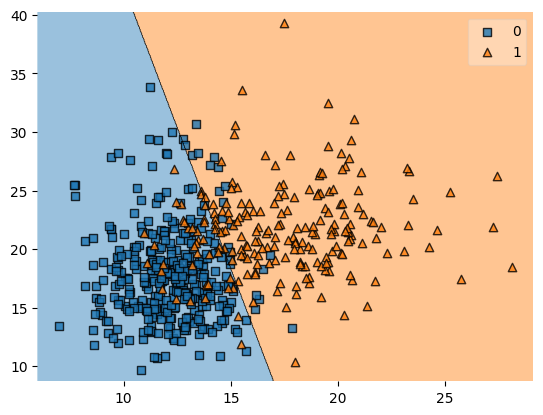

In [27]:
#use mlxtend to plot decision region

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(finalFeatures, finalLabels, clf=model)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(finalLabels, model.predict(finalFeatures))

array([[334,  23],
       [ 39, 173]])

In [37]:
# Finding best features
# Use feature importance from DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

finalFeatures = data.iloc[:,[4,5,6,7]].values
finalLabels = data.diagnosis.values.ravel()

model = DecisionTreeClassifier()
model.fit(finalFeatures,finalLabels)



DecisionTreeClassifier()

In [38]:
model.feature_importances_

array([0.09055259, 0.68369434, 0.07888645, 0.14686662])

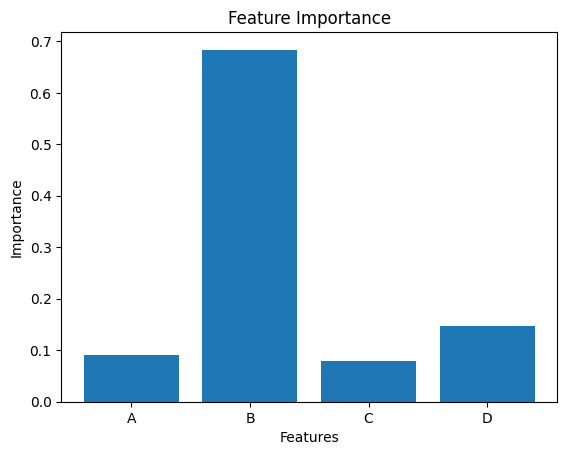

In [39]:
import matplotlib.pyplot as plt

featureImpDF = pd.DataFrame({
    'feature':['A','B','C','D'],
    'importance': model.feature_importances_
})

plt.bar(featureImpDF['feature'],featureImpDF['importance'])

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()